In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [11]:
data = pd.read_csv('逻辑回归-信用卡欺诈检测/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
data.shape

(284807, 31)

0    284315
1       492
Name: Class, dtype: int64


Text(0,0.5,'Frequency')

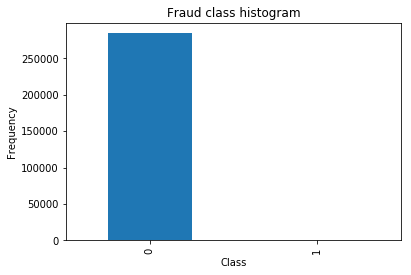

In [13]:
count_classes = pd.value_counts(data['Class'], sort=True).sort_index()
print(count_classes)
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [14]:
from sklearn.preprocessing import StandardScaler
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [19]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)
fraud_indices

array([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
         6338,   6427,   6446,   6472,   6529,   6609,   6641,   6717,
         6719,   6734,   6774,   6820,   6870,   6882,   6899,   6903,
         6971,   8296,   8312,   8335,   8615,   8617,   8842,   8845,
         8972,   9035,   9179,   9252,   9487,   9509,  10204,  10484,
        10497,  10498,  10568,  10630,  10690,  10801,  10891,  10897,
        11343,  11710,  11841,  11880,  12070,  12108,  12261,  12369,
        14104,  14170,  14197,  14211,  14338,  15166,  15204,  15225,
        15451,  15476,  15506,  15539,  15566,  15736,  15751,  15781,
        15810,  16415,  16780,  16863,  17317,  17366,  17407,  17453,
        17480,  18466,  18472,  18773,  18809,  20198,  23308,  23422,
        26802,  27362,  27627,  27738,  27749,  29687,  30100,  30314,
        30384,  30398,  30442,  30473,  30496,  31002,  33276,  39183,
        40085,  40525,  41395,  41569,  41943,  42007,  42009,  42473,
      

In [21]:
normal_indices = data[data.Class == 0].index
normal_indices

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            284797, 284798, 284799, 284800, 284801, 284802, 284803, 284804,
            284805, 284806],
           dtype='int64', length=284315)

In [22]:
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices

array([247683, 133393,  92857,  35849, 211088, 172599,  42231, 125980,
       190835,  49233, 256266,  21958, 210230, 252645, 216618, 240213,
       203622, 214111, 164327,  71101, 177954, 213575, 102165,  14154,
       124953, 172327,  20045, 101511,  88461, 199527, 235083, 275170,
       187816, 162031,  62423, 242615, 172995, 117761,   4466, 113032,
       168384,  13812,  15355, 183746,  75377, 244293, 147831, 111661,
        76933, 172183, 226250, 282799, 279941, 183373,  73285, 100248,
       178818,  23377, 107629, 216367,  45977, 163907, 243167, 274410,
        22312,  89822,  77245,    817, 132324, 141350, 188447,  67607,
       224877, 118165,  46366, 189348,  53988, 194264,  35183,  36086,
        82056, 179008,  23849,  41301, 284352,  92638,  94990,  26111,
        38208, 122094, 110739, 278175,  61633,   9446, 101575, 221141,
        30296, 271204, 263002, 124173, 186906, 282987,  98988, 215104,
       133727,  88730, 235920,  20533, 226429, 116660,  39974, 171267,
      

In [24]:
random_normal_indices = np.array(random_normal_indices)
random_normal_indices

array([247683, 133393,  92857,  35849, 211088, 172599,  42231, 125980,
       190835,  49233, 256266,  21958, 210230, 252645, 216618, 240213,
       203622, 214111, 164327,  71101, 177954, 213575, 102165,  14154,
       124953, 172327,  20045, 101511,  88461, 199527, 235083, 275170,
       187816, 162031,  62423, 242615, 172995, 117761,   4466, 113032,
       168384,  13812,  15355, 183746,  75377, 244293, 147831, 111661,
        76933, 172183, 226250, 282799, 279941, 183373,  73285, 100248,
       178818,  23377, 107629, 216367,  45977, 163907, 243167, 274410,
        22312,  89822,  77245,    817, 132324, 141350, 188447,  67607,
       224877, 118165,  46366, 189348,  53988, 194264,  35183,  36086,
        82056, 179008,  23849,  41301, 284352,  92638,  94990,  26111,
        38208, 122094, 110739, 278175,  61633,   9446, 101575, 221141,
        30296, 271204, 263002, 124173, 186906, 282987,  98988, 215104,
       133727,  88730, 235920,  20533, 226429, 116660,  39974, 171267,
      

In [27]:
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
under_sample_data = data.iloc[under_sample_indices, :]
under_sample_data.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

In [28]:
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(
    X_undersample,y_undersample, test_size=0.3, random_state=0)

In [35]:
print(len(X_train))
print(len(y_test))
print(len(X_train_undersample))
print(len(y_test_undersample))

199364
85443
688
296


In [42]:
# recall = TP/ TP + FN
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, recall_score, classification_report

In [66]:
def printing_Kfold_scores(x_train_data, y_train_data):
    fold = KFold(5,shuffle=False)
    c_param_range = [0.001,0.01,0.1,1,10,100]
    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range
    
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        m = 0
        for train_index, test_index in fold.split(x_train_data):

            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(C = c_param, penalty = 'l1')

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(x_train_data.iloc[train_index,:],y_train_data.iloc[train_index,:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_undersample = lr.predict(x_train_data.iloc[test_index,:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[test_index,:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', m,': recall score = ', recall_acc)
            m += 1

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')
    
    best_c = results_table.iloc[results_table['C_parameter'].idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c
    

In [67]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)

-------------------------------------------
C parameter:  0.001
-------------------------------------------

Iteration  0 : recall score =  0.0
Iteration  1 : recall score =  0.0
Iteration  2 : recall score =  0.8983050847457628
Iteration  3 : recall score =  0.0
Iteration  4 : recall score =  0.0

Mean recall score  0.17966101694915254

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  0 : recall score =  0.9452054794520548
Iteration  1 : recall score =  0.9178082191780822
Iteration  2 : recall score =  1.0
Iteration  3 : recall score =  0.972972972972973
Iteration  4 : recall score =  0.9545454545454546

Mean recall score  0.9581064252297129

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  0 : recall score =  0.8356164383561644
Iteration  1 : recall score =  0.863013698630137
Iteration  2 : recall score =  0.9491525423728814
Iteration  3 : recall 

In [62]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[144   5]
 [ 10 137]]
Recall metric in the testing dataset:  0.9319727891156463


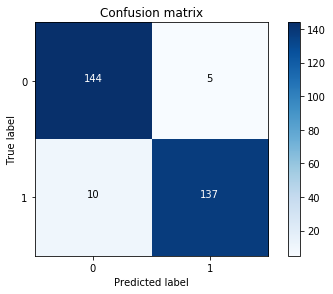

In [65]:
import itertools
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)
print(cnf_matrix)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric in the testing dataset:  0.9319727891156463


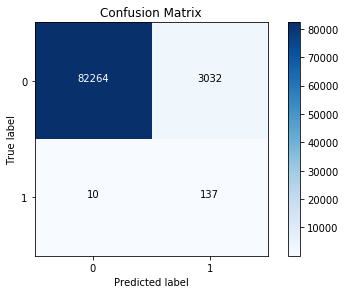

In [70]:
lr = LogisticRegression(C = best_c,penalty='l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion Matrix')
plt.show()

In [69]:
best_c = printing_Kfold_scores(X_train,y_train)

-------------------------------------------
C parameter:  0.001
-------------------------------------------

Iteration  0 : recall score =  0.13432835820895522
Iteration  1 : recall score =  0.1780821917808219
Iteration  2 : recall score =  0.13333333333333333
Iteration  3 : recall score =  0.13846153846153847
Iteration  4 : recall score =  0.075

Mean recall score  0.13184108435692976

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  0 : recall score =  0.4925373134328358
Iteration  1 : recall score =  0.6027397260273972
Iteration  2 : recall score =  0.6833333333333333
Iteration  3 : recall score =  0.5692307692307692
Iteration  4 : recall score =  0.45

Mean recall score  0.5595682284048672

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  0 : recall score =  0.5671641791044776
Iteration  1 : recall score =  0.6164383561643836
Iteration  2 : reca

Recall metric in the testing dataset:  0.6190476190476191


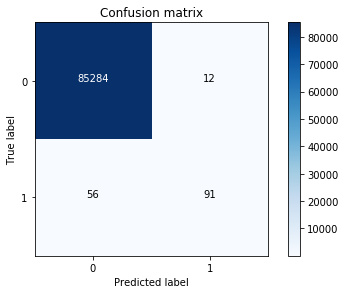

In [71]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train,y_train.values.ravel())
y_pred_undersample = lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

(296, 2)
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  0.9863945578231292
Recall metric in the testing dataset:  0.9319727891156463
Recall metric in the testing dataset:  0.8843537414965986
Recall metric in the testing dataset:  0.8367346938775511
Recall metric in the testing dataset:  0.7687074829931972
Recall metric in the testing dataset:  0.5918367346938775


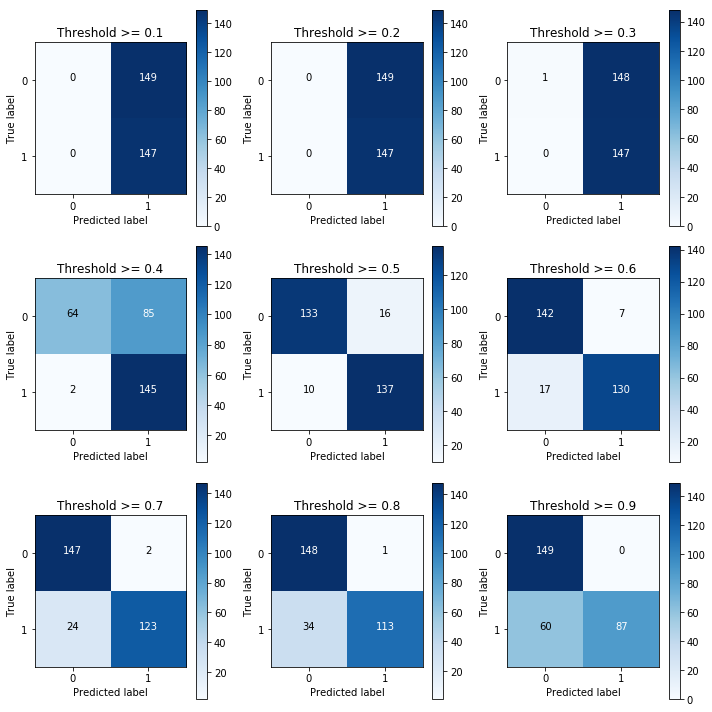

In [76]:
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)
print(y_pred_undersample_proba.shape)
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))
j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

In [74]:
# print(X_train_undersample)
print(X_train_undersample.values)

[[-1.86  3.44 -4.47 ...  0.42  0.21 -0.35]
 [-2.9   2.04 -0.21 ... -2.   -0.45 -0.35]
 [ 2.11  0.62 -2.83 ...  0.02  0.01 -0.35]
 ...
 [ 1.77 -0.14 -2.49 ... -0.01  0.01  0.21]
 [ 1.26  0.34  0.3  ... -0.02  0.03 -0.35]
 [ 0.06  0.68 -0.28 ...  0.23  0.07 -0.32]]


In [77]:
yy = y_pred_undersample_proba
yy_call = yy[:,1]>0.8
yy_call

array([False, False,  True, False, False,  True,  True, False, False,
       False, False,  True,  True,  True, False,  True, False, False,
        True,  True, False, False,  True, False,  True, False,  True,
       False, False, False, False, False, False, False,  True,  True,
        True, False,  True,  True,  True, False, False,  True, False,
       False,  True,  True,  True, False, False, False, False, False,
        True,  True, False, False, False,  True,  True, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False,  True,  True, False,  True,
       False, False,  True, False, False,  True, False,  True, False,
       False, False, False, False,  True, False,  True, False,  True,
       False,  True, False, False, False,  True, False, False,  True,
       False,  True, False,  True,  True, False, False, False,  True,
       False, False,  True,  True, False, False,  True,  True, False,
       False, False,

In [79]:
cnf_matrix_mm = confusion_matrix(y_test_undersample,yy_call)
cnf_matrix_mm

array([[148,   1],
       [ 34, 113]])

In [80]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [81]:
credit_cards=pd.read_csv('逻辑回归-信用卡欺诈检测/creditcard.csv')

In [82]:
len(y_train[y_train==1])

199364

In [83]:
len(y_train[y_train==0])

199364

In [84]:
data.shape

(284807, 30)

In [85]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [86]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [89]:
columns = data.columns
columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'normAmount'],
      dtype='object')

In [92]:
features_columns = columns.delete(len(columns)-2)
features_columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'normAmount'],
      dtype='object')

In [93]:
features = data[features_columns]
labels = data['Class']

In [95]:
labels.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [97]:
feature_train, feature_test, label_train, label_test = train_test_split(features,labels,test_size=0.3,random_state=0)

In [98]:
label_train.value_counts()

0    199019
1       345
Name: Class, dtype: int64

In [99]:
oversampler = SMOTE(random_state=0)
os_feature, os_label = oversampler.fit_sample(feature_train, label_train)

In [100]:
len(os_label[os_label==1])

199019

In [105]:
type(os_label)

numpy.ndarray

In [106]:
os_features = pd.DataFrame(os_feature)
os_labels = pd.DataFrame(os_label)
best_c2 = printing_Kfold_scores(os_features, os_labels) 

-------------------------------------------
C parameter:  0.001
-------------------------------------------

Iteration  0 : recall score =  0.9285714285714286
Iteration  1 : recall score =  0.896
Iteration  2 : recall score =  0.9060192210419828
Iteration  3 : recall score =  0.8899343022598515
Iteration  4 : recall score =  0.8900599193538257

Mean recall score  0.9021169742454177

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  0 : recall score =  0.9285714285714286
Iteration  1 : recall score =  0.912
Iteration  2 : recall score =  0.9130247850278199
Iteration  3 : recall score =  0.8972954639667365
Iteration  4 : recall score =  0.8974336427701082

Mean recall score  0.9096650640672188

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  0 : recall score =  0.9285714285714286
Iteration  1 : recall score =  0.92
Iteration  2 : recall score =  0.914

In [ ]:
lr = LogisticRegression(C = best_c2, penalty = 'l1')
lr.fit(os_features,os_labels.values.ravel())
y_pred = lr.predict(feature_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(label_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()